<a href="https://colab.research.google.com/github/mayconrralves/TrabalhoML-ADA/blob/main/trabalhoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABALHO - FUNDAMENTOS DE ML
### Professor Mauricio
### Equipe: Abraão, Maycon, Antonio Alexandre, Leandro e João

## Base de Dados:  Breast Cancer Wisconsin (Diagnostic)



Prever se o câncer é benigno ou maligno <br>
As características são calculadas a partir de uma imagem digitalizada de uma aspiração por agulha fina (PAAF) # de uma massa mamária. Elas descrevem características dos núcleos celulares presentes na imagem.
No espaço tridimensional, a descrição é a descrita em: [K. P. Bennett e O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
# imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import auc, roc_curve

from zipfile import ZipFile
import urllib

#retirando os warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importa os arquivos direto do Kaggle
DATA_URL = "https://www.kaggle.com/api/v1/datasets/download/uciml/breast-cancer-wisconsin-data"
urllib.request.urlretrieve(DATA_URL, "data.zip")

with ZipFile("data.zip", "r") as zip_file:
  zip_file.extractall(".")

In [ ]:
# carregando a base
# indicando que a primeira coluna do arquivo é indice
data = pd.read_csv('data.csv', index_col=0)

data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  ...  texture_worst  \
id                                            ...                  
842302                0.14710         0.2419  ...          17.33   
842517                0.07017         0.1812  ...          23.41   
84300903              0.12790         0.2069  ...          25.53   
84348301              0.10520         0.2597  ...          26.50   
84358402              0.10430         0.1809  ...          16.67   

          perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                           
842302             184.60      2019.0            0.1622             0.6656   
842517             158.80      1956.0            0.1238             0.1866   
84300903           152.50      1709.0            0.1444             0.4245   
84348301            98.87       567.7            0.2098             0.8663   
84358402           152.20      1575.0            0.1374             0.2050   

          concavity_worst  concave points_worst  symmetry_worst  \
id                                                                
842302             0.7119                0.2654          0.4601   
842517             0.2416                0.1860          0.2750   
84300903           0.4504                0.2430          0.3613   
84348301           0.6869                0.2575          0.6638   
84358402           0.4000                0.1625          0.2364   

          fractal_dimension_worst  Unnamed: 32  
id                                              
842302                    0.11890          NaN  
842517                    0.08902          NaN  
84300903                  0.08758          NaN  
84348301                  0.17300          NaN  
84358402                  0.07678          NaN  

[5 rows x 32 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [ ]:
# última coluna somente dados nulos (remover do dataframe)
data= data.iloc[:, :-1]

display(data)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   
...            ...          ...           ...             ...        ...   
926424           M        21.56         22.39          142.00     1479.0   
926682           M        20.13         28.25          131.20     1261.0   
926954           M        16.60         28.08          108.30      858.1   
927241           M        20.60         29.33          140.10     1265.0   
92751            B         7.76         24.54           47.92      181.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760         0.30010   
842517            0.08474           0.07864         0.08690   
84300903          0.10960           0.15990         0.19740   
84348301          0.14250           0.28390         0.24140   
84358402          0.10030           0.13280         0.19800   
...                   ...               ...             ...   
926424            0.11100           0.11590         0.24390   
926682            0.09780           0.10340         0.14400   
926954            0.08455           0.10230         0.09251   
927241            0.11780           0.27700         0.35140   
92751             0.05263           0.04362         0.00000   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
842302                0.14710         0.2419  ...        25.380   
842517                0.07017         0.1812  ...        24.990   
84300903              0.12790         0.2069  ...        23.570   
84348301              0.10520         0.2597  ...        14.910   
84358402              0.10430         0.1809  ...        22.540   
...                       ...            ...  ...           ...   
926424                0.13890         0.1726  ...        25.450   
926682                0.09791         0.1752  ...        23.690   
926954                0.05302         0.1590  ...        18.980   
927241                0.15200         0.2397  ...        25.740   
92751                 0.00000         0.1587  ...         9.456   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
842302            17.33           184.60      2019.0           0.16220   
842517            23.41           158.80      1956.0           0.12380   
84300903          25.53           152.50      1709.0           0.14440   
84348301          26.50            98.87       567.7           0.20980   
84358402          16.67           152.20      1575.0           0.13740   
...                 ...              ...         ...               ...   
926424            26.40           166.10      2027.0           0.14100   
926682            38.25           155.00      1731.0           0.11660   
926954            34.12           126.70      1124.0           0.11390   
927241            39.42           184.60      1821.0           0.16500   
92751             30.37            59.16       268.6           0.08996   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
842302              0.66560           0.7119                0.2654   
842517              0.18660           0.2416                0.1860   
84300903            0.42450           0.4504                0.2430   
84348301       

In [ ]:
# dividindo o dataFrame nos conjuntos X e y

X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se           

# Análise Exploratória dos dados

In [ ]:
linhas, colunas = X.shape

print(f"Número de amostras: {linhas}")
print(f"Número de features: {colunas}")
print(f"Nomes das classes: {X.columns}")


Número de amostras: 569
Número de features: 30
Nomes das classes: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


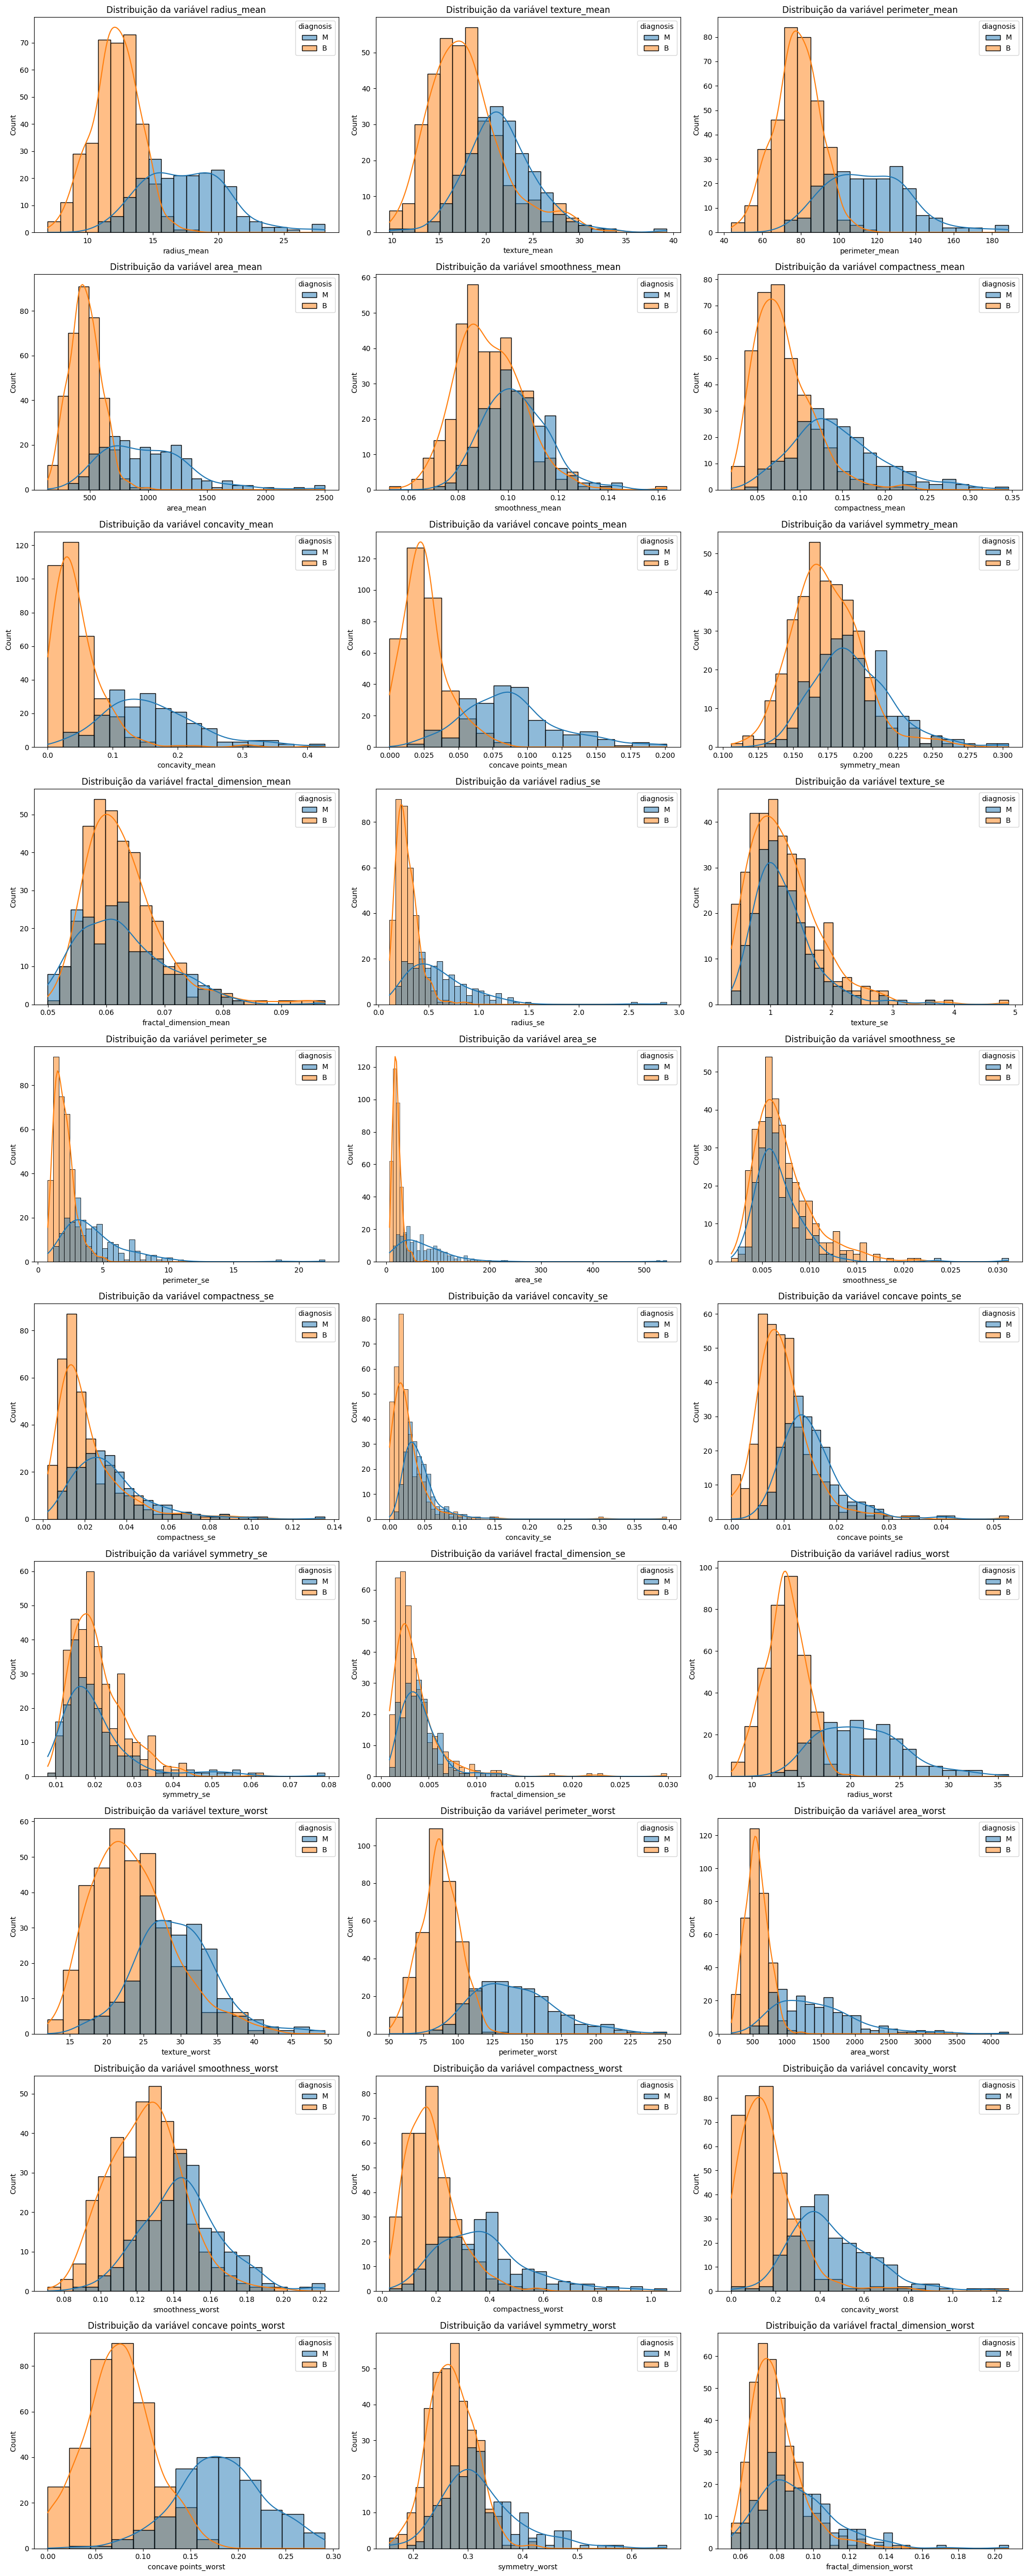

In [ ]:
# distribuições das variaveis com relação ao Y (diagnóstico)
# exibidas em uma matriz 10x3
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 50))
axes = axes.flatten()


for i, coluna in enumerate(X.columns):
    sns.histplot(data=X, x=coluna, kde=True, hue=y, ax=axes[i])
    axes[i].set_title(f"Distribuição da variável {coluna}")


# Remove subplots não utilizados (caso X tenha menos de 32 colunas)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.savefig('histogramas.png')
plt.show()



### AVALIAÇÃO DOS HISTOGRAMAS :
* Variáveis como radius_mean, texture_mean, perimeter_mean, area_mean, e concavity_mean mostram distribuições bem distintas entre tumores malignos e benignos.
Isso indica que essas variáveis têm alto poder discriminativo e são úteis para modelos de classificação.<BR>

* Algumas variáveis, como symmetry_mean ou fractal_dimension, apresentam maior sobreposição entre as classes, o que pode indicar menor relevância isolada.

* Tumores malignos tendem a ter valores mais altos em medidas como área, perímetro e concavidade.
* Tumores benignos geralmente têm valores mais baixos nas features.

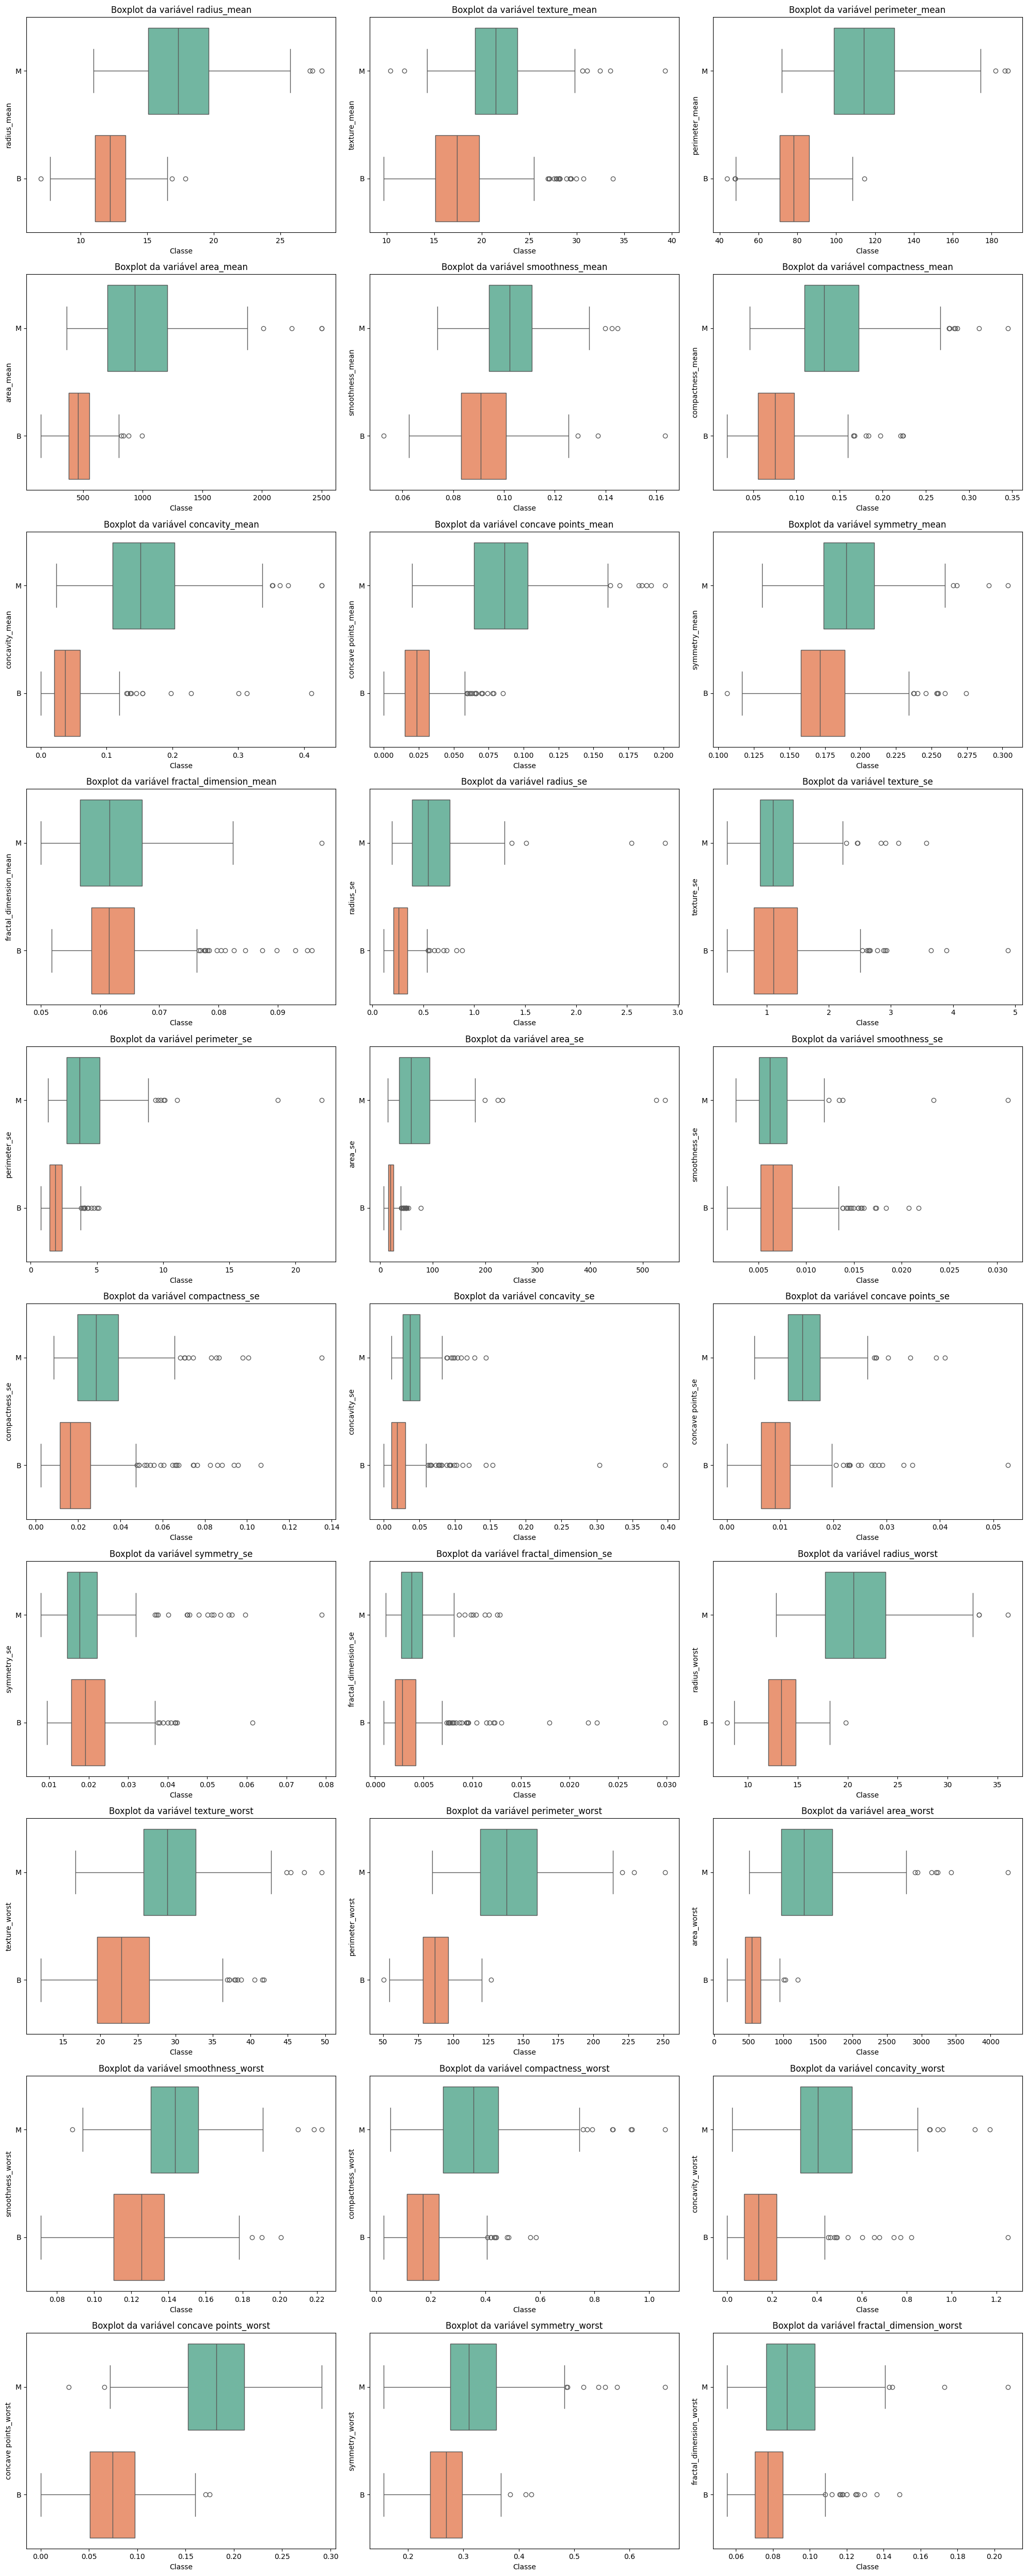

In [ ]:
#exibindo os boxplots das variáveis

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 50))
axes = axes.flatten()

for i, coluna in enumerate(X.columns):
    sns.boxplot(y=y, x=X[coluna], ax=axes[i], palette="Set2")
    axes[i].set_title(f"Boxplot da variável {coluna}")
    axes[i].set_xlabel("Classe")
    axes[i].set_ylabel(coluna)

# Remove subplots não utilizados (caso existam)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### AVALIAÇÃO DOS BOXPLOTs :
* Variáveis como RAIO, PERÍMETRO, ÁREA, CONCAVIDADE e COMPACTNESS mostram medianas mais altas para tumores malignos.<BR>
Isso indica que tumores malignos tendem a ser maiores e mais irregulares.
* Algumas variáveis apresentam outliers visíveis, especialmente na classe maligna, o que pode indicar casos extremos ou tumores com características muito distintas.
* Quando os boxplots das duas classes têm pouca sobreposição, isso sugere que a variável tem alto poder discriminativo.
Exemplo: texture_mean, radius_worst, area_worst.

In [ ]:
# estudo da variável diagnóstico
proporcao = y.value_counts()

print(f"Proporção de classes: Benigno: ({proporcao.iloc[0]}), Maligno: ({proporcao.iloc[1]})")

Proporção de classes: Benigno: (357), Maligno: (212)


count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

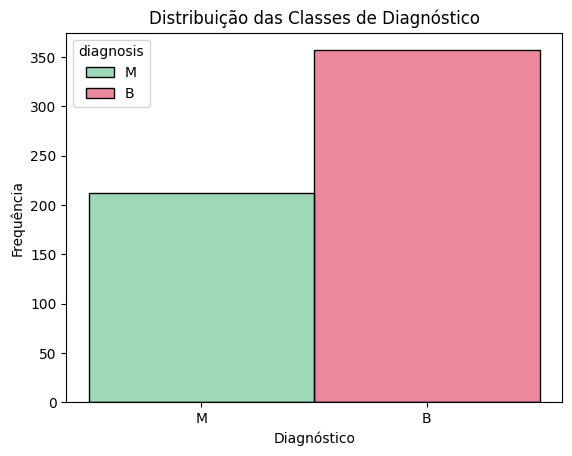

In [ ]:
display(y.describe())

sns.histplot(data=data, x='diagnosis', hue='diagnosis', palette={'M': 'mediumseagreen', 'B': 'crimson'})

plt.title("Distribuição das Classes de Diagnóstico")

plt.xlabel("Diagnóstico")
plt.ylabel("Frequência")

plt.show()


<Axes: >

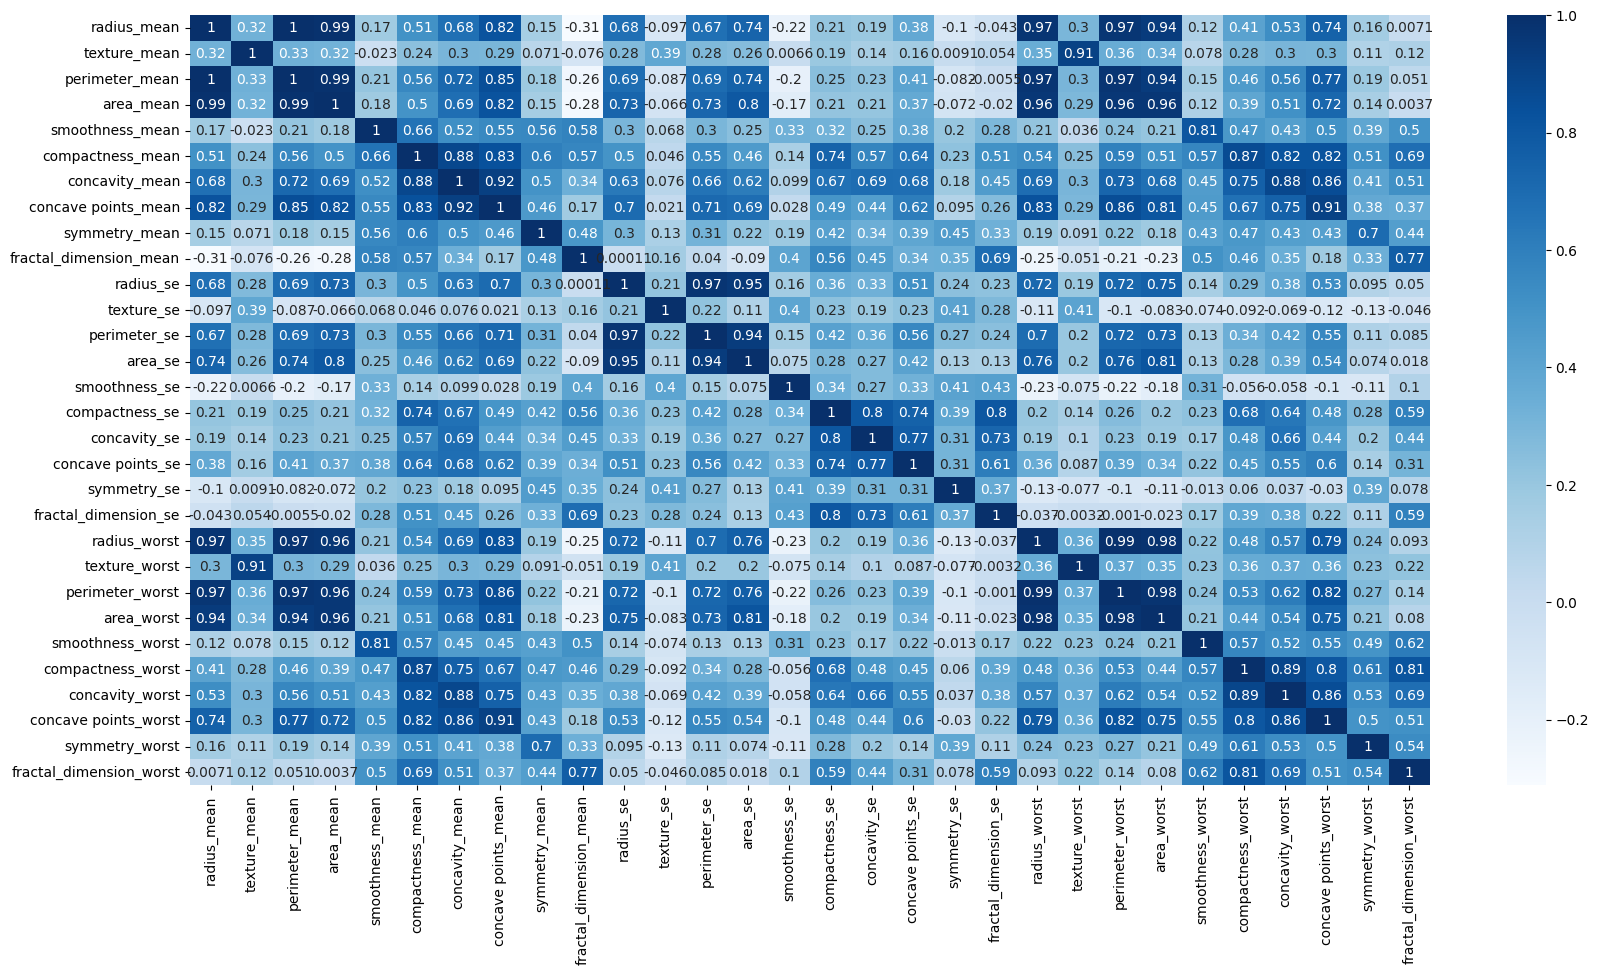

In [ ]:
# matriz de correlação

plt.figure(figsize=(20, 10))

sns.heatmap(X.corr(), annot=True, cmap='Blues')

### ALTAS CORRELAÇÕES EM ALGUMAS FEATURES. Exemplos:  <br>
* concavity_mean X concave_points_mean: 0.92<br>
* concave_points_mean X concave_points_wost: 0.91<br>
* radius_se X perimeter_se : 0.97<br>
* radius_se X area_se: 0.95<br>
* radius_mean X radius_worst: 0.97<br>
* perimeter_se X area_se: 0.94<br>
* texture_mean X texture_worst: 0.91<br>
* perimeter_worst X radius_worst: 0.99<br>
* area_worst X radius_worst: 0.98<br>


# Pré-processamento

In [ ]:
# Padronizando o vetor X com Standart Scaler

Sta = StandardScaler()
X_scale = Sta.fit_transform(X)

In [ ]:
# aplicar PCA para redução de dimensões

from sklearn.decomposition import PCA

# retendo 98% de variância das features
pca = PCA(n_components=0.98)

X_pca = pca.fit_transform(X_scale)

pd.DataFrame(X_pca).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
dtypes: float64(14)
memory usage: 62.4 KB


* RESULTADO: 14 componentes do PCA explicam 98% de variância dos dados originais, com baixíssima correlação

<Axes: >

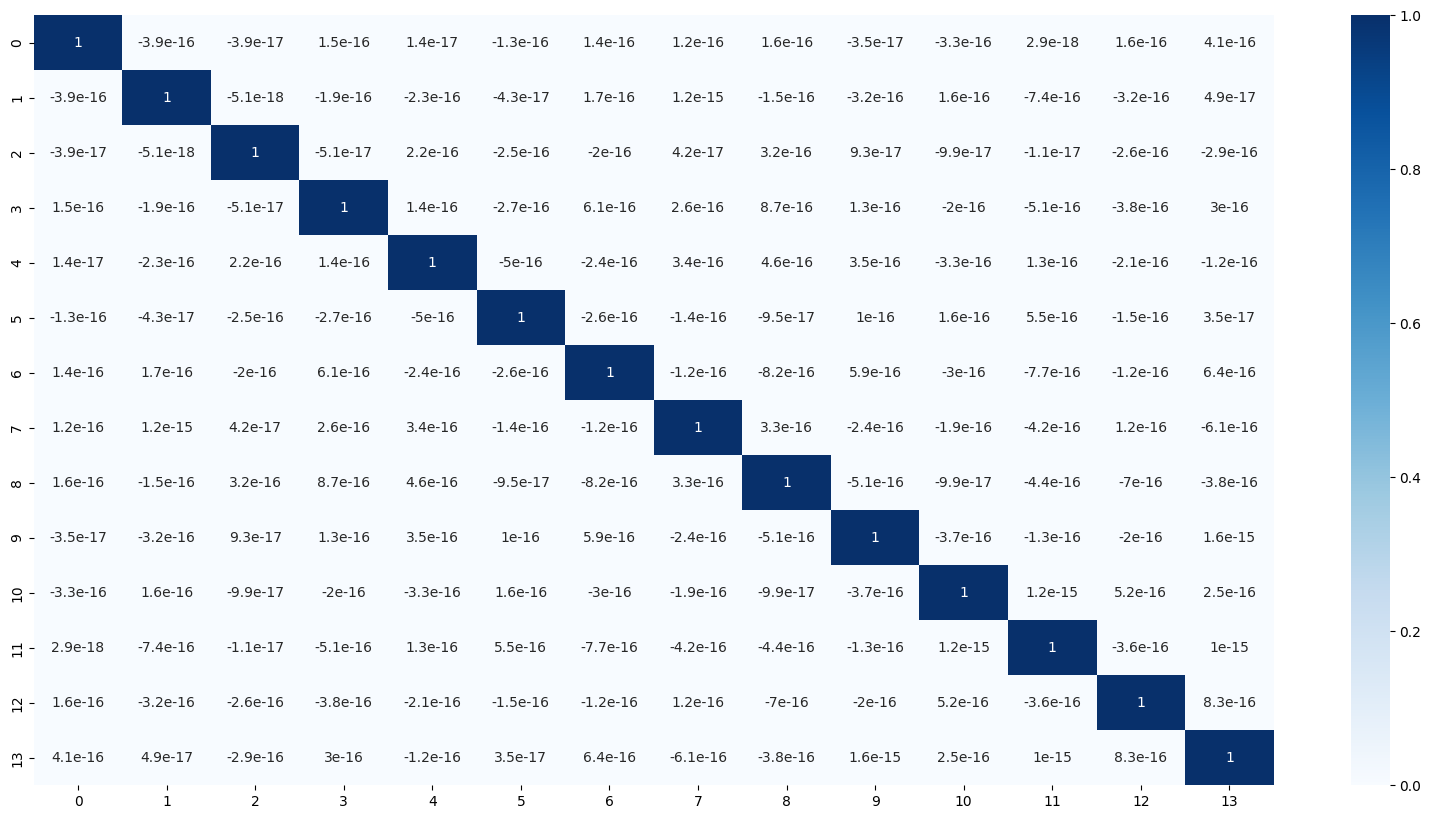

In [ ]:
# nova matriz de correlação, após a diminuição de dimensionalidade

plt.figure(figsize=(20, 10))

sns.heatmap(pd.DataFrame(X_pca).corr(), annot=True, cmap='Blues')

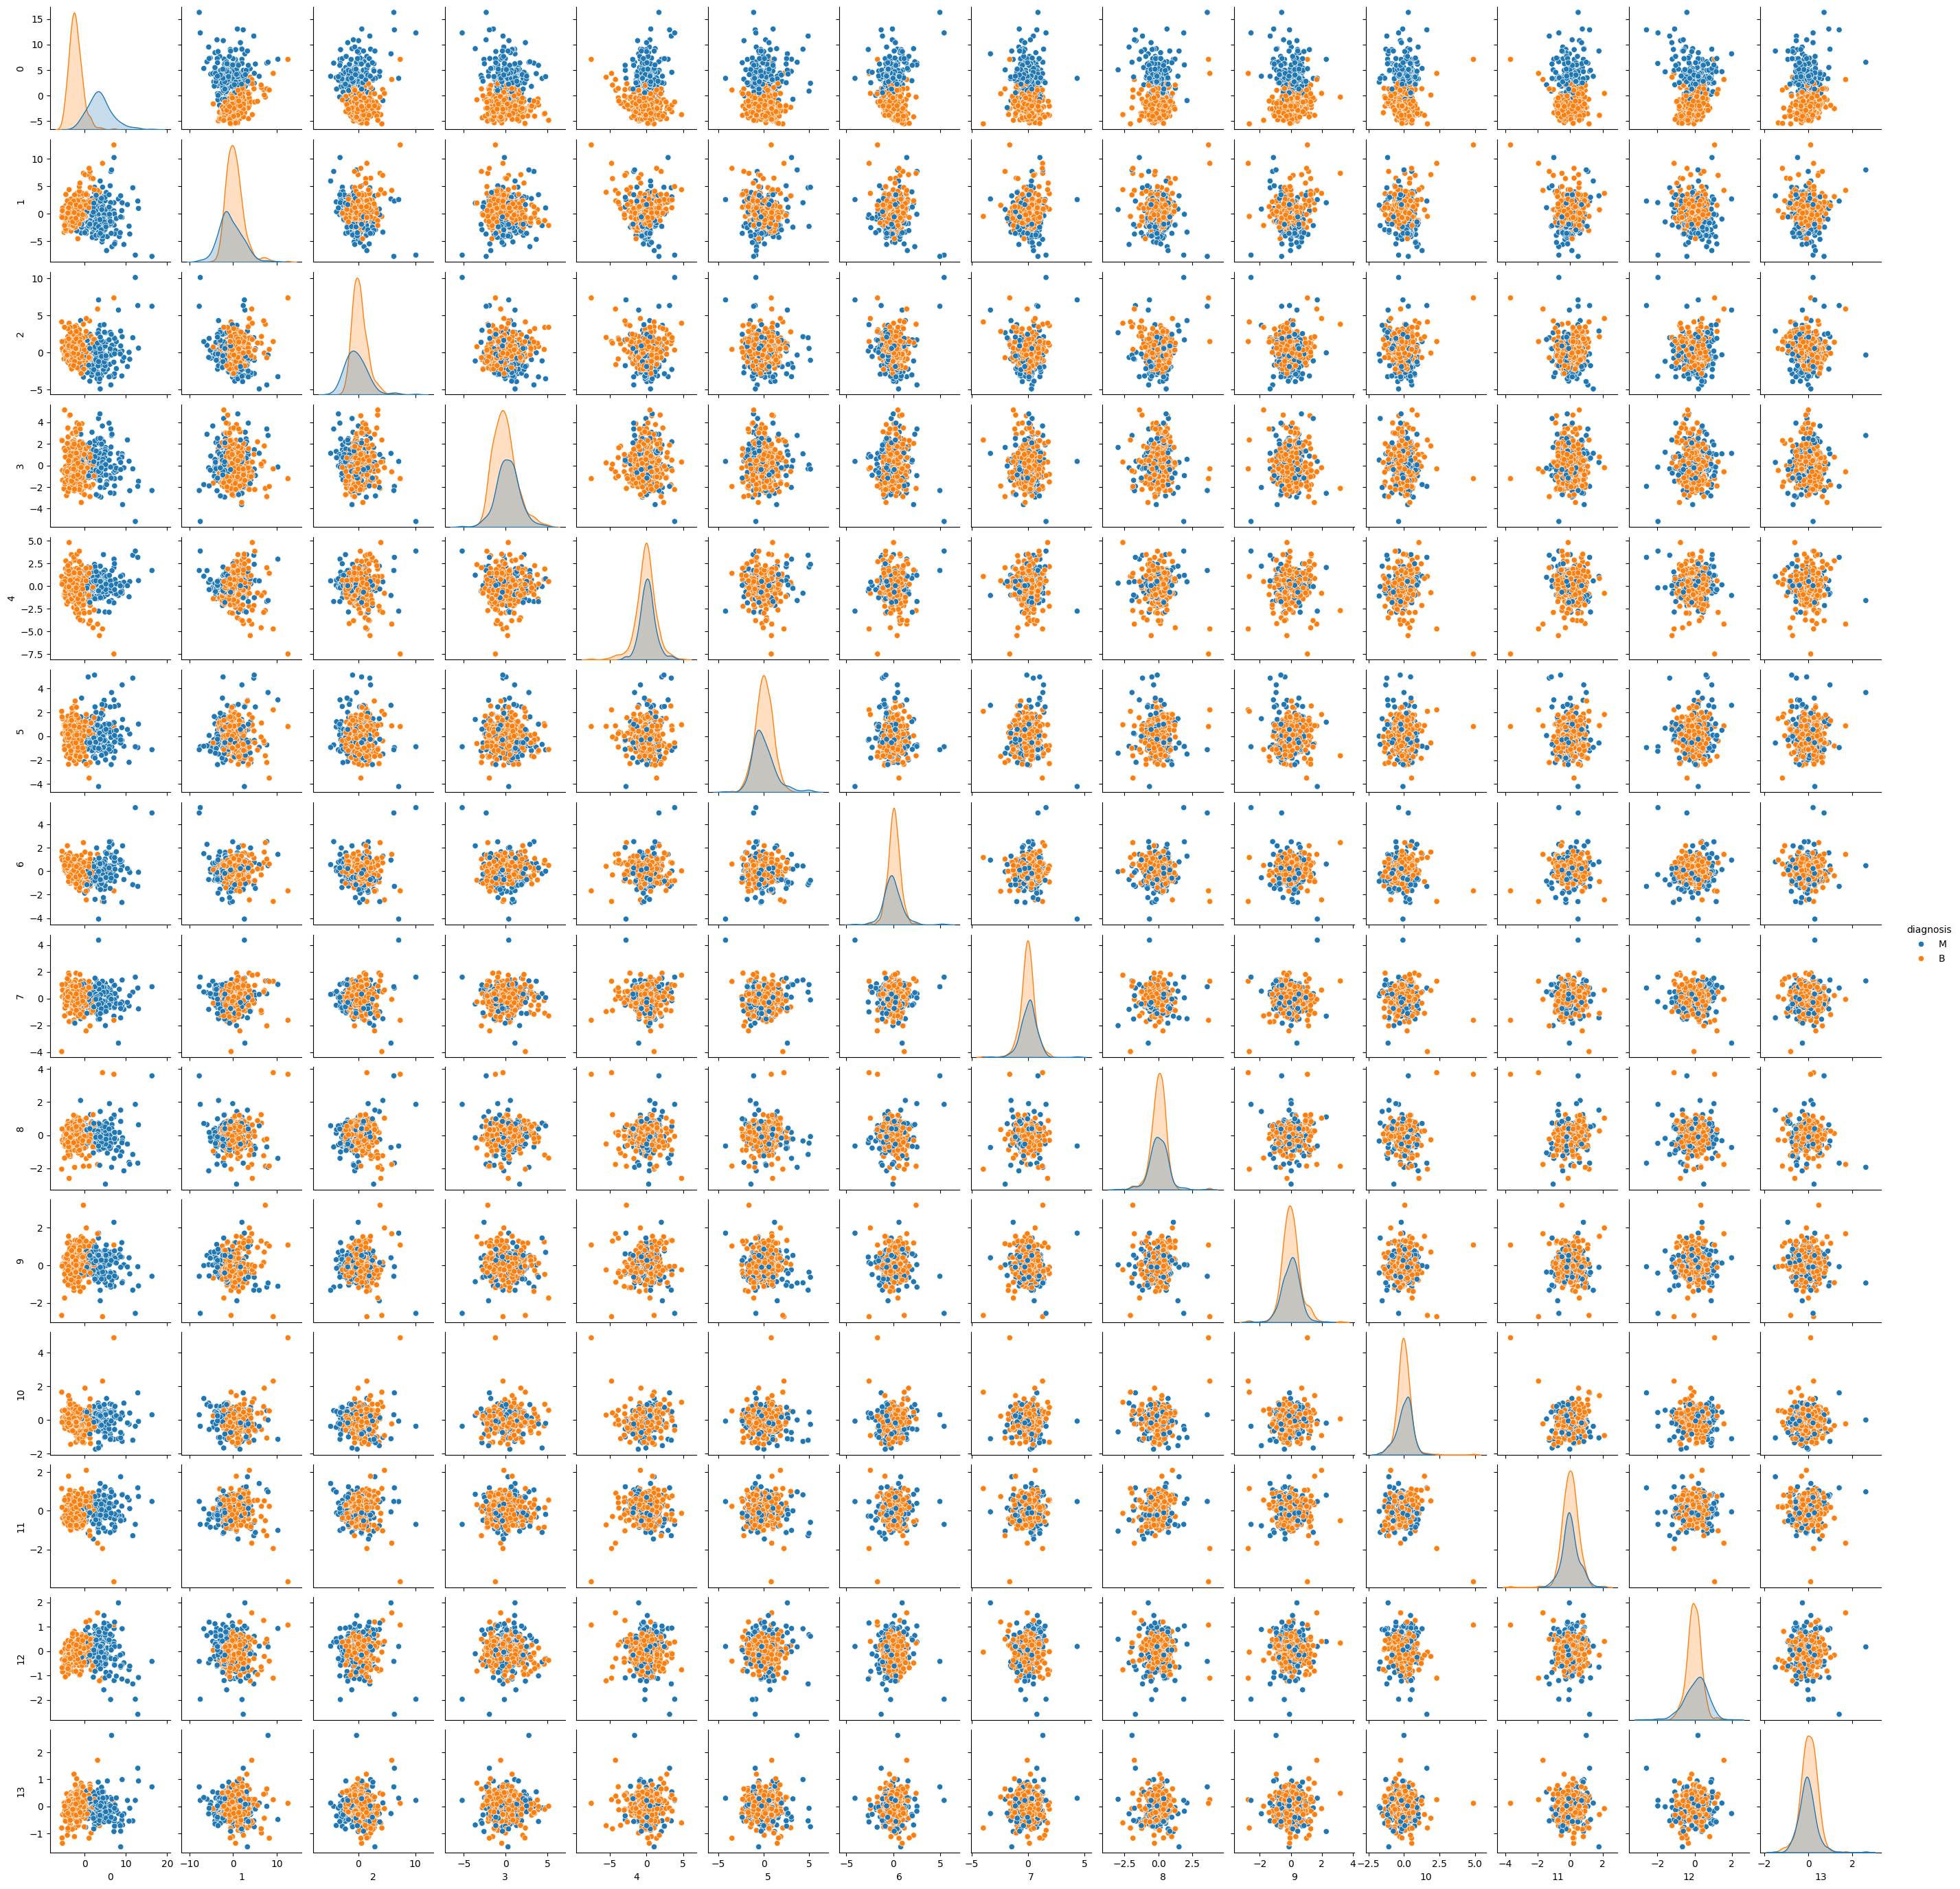

In [ ]:
# imprimindo o pairPlot após a redução de dimensões

df_pca = pd.DataFrame(X_pca)

df_pca['diagnosis'] = y.to_numpy()

# df_pca.head()

sns.pairplot(data=pd.DataFrame(df_pca), hue='diagnosis', height=2, aspect=1)

### AVALIAÇÃO DO PAIRPLOT : <br>
* Separabilidade das classes em relação a um par de variáveis<br>
* Distribuição condicional das classes em relação a um par de variáveis<br>
* Detecção visual de outliers<br>



# DIVISAO DOS DADOS EM TREINO E TESTE:

In [ ]:
# mapeando o Benigno como 0 e Maligno como 1
y_map = y.map({'B': 0, 'M': 1})

In [ ]:
# dividindo em conjuntos de treino e testes
p = 0.2

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_map, test_size=p, random_state=1, stratify=y)

In [ ]:
# funcao que imprime as métricas

def imprimeMetricas(y_real, y_pred):

    acuracia = accuracy_score(y_real, y_pred)
    precisao = precision_score(y_real, y_pred)
    recall = recall_score(y_real, y_pred)
    f1score = f1_score(y_real, y_pred)
    classif = classification_report(y_real, y_pred, digits=4)

    print(f"Acuracia: {acuracia:.4f}")
    print(f"Precisao: {precisao:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1score:.4f}\n")
    print(f"Classification Report:\n {classif}")

def imprimeMatrizConfusao(y_test, y_pred, norm=None):
    cm = confusion_matrix(y_test, y_pred, normalize=norm)

    fig, ax = plt.subplots()

    # Define o formato de exibição
    fmt = ".3f" if norm else "d"

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benigno', 'Maligno'])
    disp.plot(ax=ax, values_format=fmt)

    if (norm):
        ax.set_title("Matriz de Confusão Normalizada")
    else:
        ax.set_title("Matriz de Confusão")

    plt.show()


In [ ]:
def gerar_equacao_hiperplano(w, b):
    equacao = " + ".join([f"{w[i]:.4f}·x{i+1}" for i in range(len(w))])
    equacao += f" + ({b:.2f}) = 0"

    return "Equação do hiperplano: " + equacao

# Aplicação dos Modelos

In [ ]:
# lista de tuplas para armazenar as métricas da árvore roc (nome_modelo, fpr, tpr)
metricas_curva_roc = []

## 1 - Regressão Logística

A regressão logística é um algoritmo de classificação em Machine Learning, usado para prever a probabilidade de uma observação pertencer a uma determinada classe, usando para isso a Função Sigmoide (logística).

In [ ]:
# regressao logistica
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("Regressão Logística", fpr, tpr))

In [ ]:
# coeficientes da equação do hiperplano
w = model.coef_[0]
# costante/bias da equação do hiperplano
b = model.intercept_[0]

gerar_equacao_hiperplano(w, b)

'Equação do hiperplano: 2.5051·x1 + -1.2742·x2 + -0.3925·x3 + 0.5822·x4 + 1.0399·x5 + -0.3973·x6 + 0.2706·x7 + 0.7688·x8 + 0.7612·x9 + -0.5196·x10 + 0.6590·x11 + -0.1730·x12 + 0.5747·x13 + -1.0972·x14 + (-0.17) = 0'

In [ ]:
# métricas de avaliação
imprimeMetricas(y_test, y_pred)

Acuracia: 0.9825
Precisao: 0.9762
Recall: 0.9762
F1 Score: 0.9762

Classification Report:
               precision    recall  f1-score   support

           0     0.9861    0.9861    0.9861        72
           1     0.9762    0.9762    0.9762        42

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114



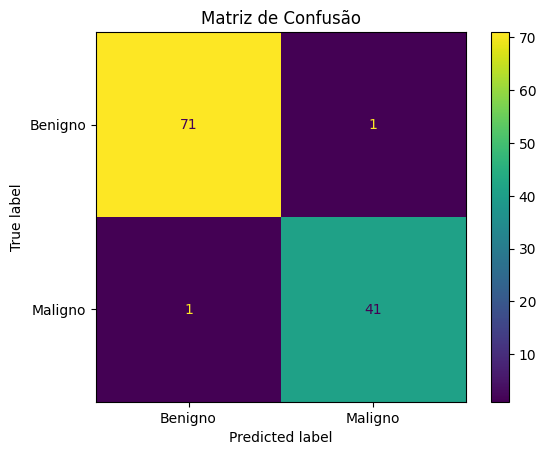

In [ ]:
# matriz de confusao
imprimeMatrizConfusao(y_test, y_pred)

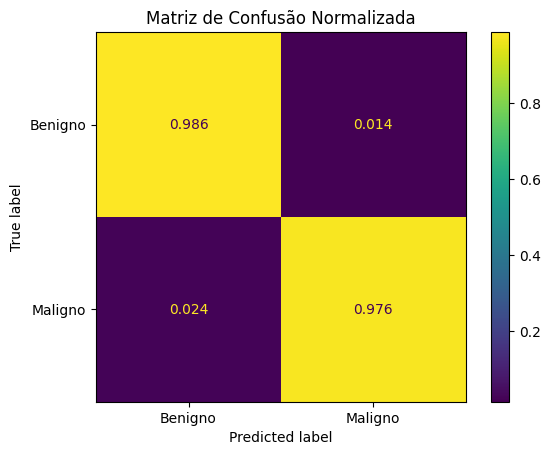

In [ ]:
# matriz de confusao normalizada
imprimeMatrizConfusao(y_test, y_pred, 'true')

### Regressão Linear não se aplica nesse caso (classificação binária)

O banco de dados é usado para classificação binária: prever se um tumor é maligno ou benigno, com base em características extraídas de imagens de células mamárias. <br>
Sendo assim não é ideal para classificação, pois ela prevê valores contínuos.


# 2 - Regressão Logística Polinomial de Grau 2

A regressão logística polinomial de grau 2 é uma extensão da regressão logística tradicional que permite modelar relações não lineares entre as variáveis independentes (features) e a variável dependente (classe)

In [ ]:
# Regressão Logística Polinomial de grau 2, utilizando um pipeline de treinamento
pipeline = make_pipeline(
    PolynomialFeatures(degree=2),
    LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("Regressão Logística Polinomial", fpr, tpr))


In [ ]:
model = pipeline.named_steps['logisticregression']

# coeficientes da equação do hiperplano
w = model.coef_[0]
# costante/bias da equação do hiperplano
b = model.intercept_[0]

gerar_equacao_hiperplano(w, b)

'Equação do hiperplano: -0.0031·x1 + 2.1497·x2 + -1.3074·x3 + -0.7246·x4 + 0.9703·x5 + 0.3869·x6 + -0.6638·x7 + -0.1512·x8 + 0.3376·x9 + 0.4325·x10 + -0.1475·x11 + 0.9275·x12 + -0.2426·x13 + 0.1864·x14 + -0.4447·x15 + 0.0867·x16 + -0.0268·x17 + -0.2869·x18 + 0.0414·x19 + -0.1217·x20 + -0.0387·x21 + -0.3101·x22 + -0.0584·x23 + -0.1389·x24 + 0.2676·x25 + -0.3436·x26 + -0.0805·x27 + -0.1232·x28 + 0.2225·x29 + 0.1067·x30 + 0.0483·x31 + -0.1517·x32 + -0.0138·x33 + 0.1383·x34 + -0.3002·x35 + -0.2653·x36 + -0.4139·x37 + 0.1611·x38 + -0.0395·x39 + 0.1574·x40 + 0.1165·x41 + -0.0797·x42 + 0.3277·x43 + -0.2783·x44 + 0.3752·x45 + 0.1827·x46 + -0.3605·x47 + 0.0464·x48 + 0.5191·x49 + 0.1208·x50 + -0.4731·x51 + -0.2563·x52 + -0.0720·x53 + 0.2105·x54 + -0.2731·x55 + 0.1538·x56 + -0.2723·x57 + -0.5564·x58 + 0.0001·x59 + 0.0933·x60 + -0.0338·x61 + 0.3766·x62 + -0.0217·x63 + 0.3163·x64 + 0.0854·x65 + -0.3654·x66 + 0.3894·x67 + 0.1700·x68 + -0.1546·x69 + 0.2229·x70 + -0.0102·x71 + 0.0068·x72 + 0.0026·x73 

In [ ]:
imprimeMetricas(y_test, y_pred)

Acuracia: 0.9474
Precisao: 0.9500
Recall: 0.9048
F1 Score: 0.9268

Classification Report:
               precision    recall  f1-score   support

           0     0.9459    0.9722    0.9589        72
           1     0.9500    0.9048    0.9268        42

    accuracy                         0.9474       114
   macro avg     0.9480    0.9385    0.9429       114
weighted avg     0.9474    0.9474    0.9471       114



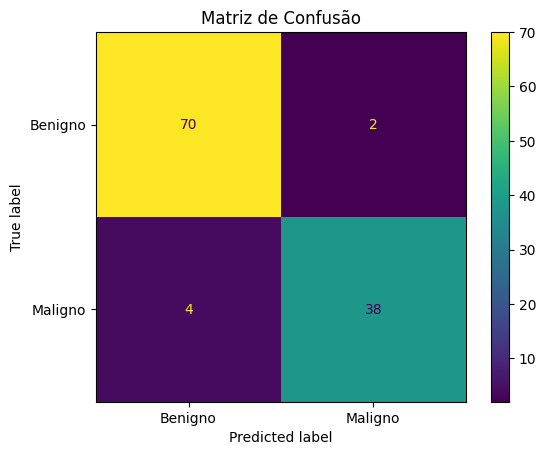

In [ ]:
imprimeMatrizConfusao(y_test, y_pred)

# 3 - Support Vector Machine (SVM)
O SVM busca encontrar o hiperplano que melhor separa as classes, maximizando a margem entre elas (vetores de suporte).<br>
Faremos com dois kernels: linear e não-linear (RBF - Radial Basis Function).




In [ ]:
# SVM com Kernel Linear
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("SVM com Kernel Linear", fpr, tpr))

In [ ]:
# coeficientes da equação do hiperplano
w = svm_linear.coef_[0]
# costante/bias da equação do hiperplano
b = svm_linear.intercept_[0]

gerar_equacao_hiperplano(w, b)

'Equação do hiperplano: 1.8382·x1 + -0.9166·x2 + -0.2997·x3 + 0.3322·x4 + 0.6669·x5 + -0.3294·x6 + 0.0850·x7 + 0.7005·x8 + 0.6767·x9 + -0.2624·x10 + 0.3566·x11 + -0.0913·x12 + 0.6951·x13 + -0.8533·x14 + (-0.08) = 0'

In [ ]:
imprimeMetricas(y_test, y_pred)

Acuracia: 0.9825
Precisao: 0.9762
Recall: 0.9762
F1 Score: 0.9762

Classification Report:
               precision    recall  f1-score   support

           0     0.9861    0.9861    0.9861        72
           1     0.9762    0.9762    0.9762        42

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114



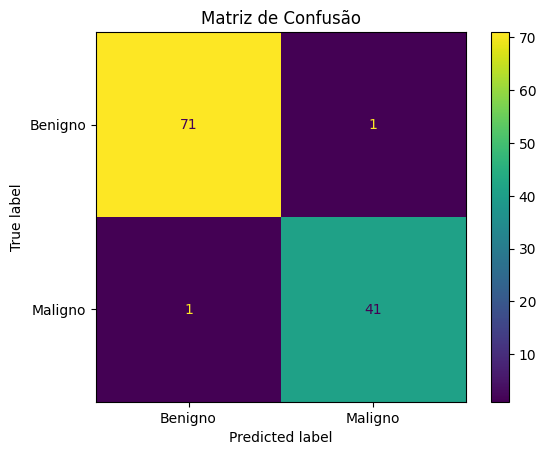

In [ ]:
imprimeMatrizConfusao(y_test, y_pred)

In [ ]:
# SVM com Kernel não-Linear
svm_poly = SVC(kernel='poly', random_state=42)
svm_poly.fit(X_train, y_train)

y_pred = svm_poly.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("SVM com Kernel não-Linear", fpr, tpr))


In [ ]:
imprimeMetricas(y_test, y_pred)

Acuracia: 0.9035
Precisao: 1.0000
Recall: 0.7381
F1 Score: 0.8493

Classification Report:
               precision    recall  f1-score   support

           0     0.8675    1.0000    0.9290        72
           1     1.0000    0.7381    0.8493        42

    accuracy                         0.9035       114
   macro avg     0.9337    0.8690    0.8892       114
weighted avg     0.9163    0.9035    0.8997       114



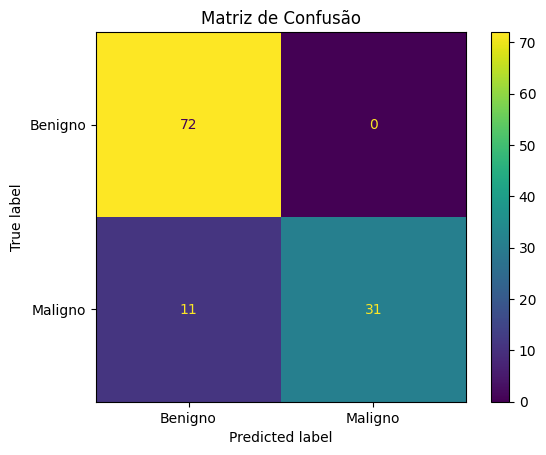

In [ ]:
imprimeMatrizConfusao(y_test, y_pred)

In [ ]:
# parâmetros do SVM
# c - penalidade do erro
# gamma - influência de cada linha de treino na decisão
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [1, 2, 3, 4],  # só afeta kernel 'poly'
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

svm_grid_search = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', verbose=1, return_train_score=True)

svm_grid_search.fit(X_train, y_train)

best_svm_model = svm_grid_search.best_estimator_

print("\nBest Parameters:")
print(svm_grid_search.best_params_)

# Evaluate the best model on the test set
y_pred_svm = best_svm_model.predict(X_test)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits

Best Parameters:
{'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly'}


In [ ]:
imprimeMetricas(y_test, y_pred_svm)

Acuracia: 0.9825
Precisao: 0.9762
Recall: 0.9762
F1 Score: 0.9762

Classification Report:
               precision    recall  f1-score   support

           0     0.9861    0.9861    0.9861        72
           1     0.9762    0.9762    0.9762        42

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114



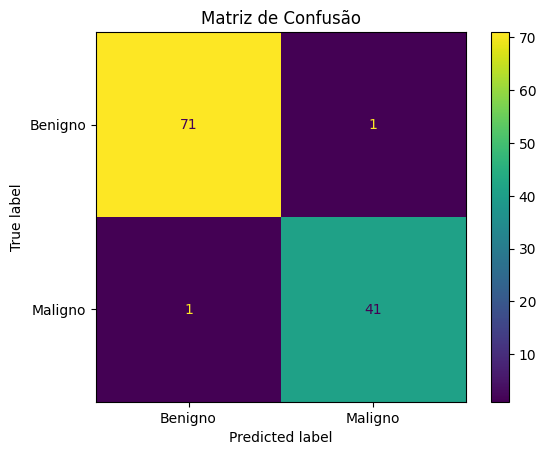

In [ ]:
imprimeMatrizConfusao(y_test, y_pred_svm)

# 4 -  Árvore de Decisão

As árvores de decisão são modelos de aprendizado supervisionado usados para classificação e regressão. <br>
Elas funcionam como um processo de tomada de decisão em etapas, semelhante a um fluxograma.<br>

Acuracia: 0.9561
Precisao: 0.9744
Recall: 0.9048
F1 Score: 0.9383

Classification Report:
               precision    recall  f1-score   support

           0     0.9467    0.9861    0.9660        72
           1     0.9744    0.9048    0.9383        42

    accuracy                         0.9561       114
   macro avg     0.9605    0.9454    0.9521       114
weighted avg     0.9569    0.9561    0.9558       114



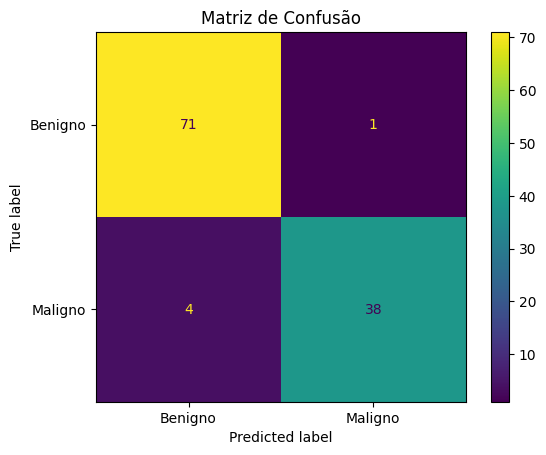

In [ ]:
# arvore de decisao

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("Árvore de Decisão", fpr, tpr))

imprimeMetricas(y_test, y_pred)

imprimeMatrizConfusao(y_test, y_pred)


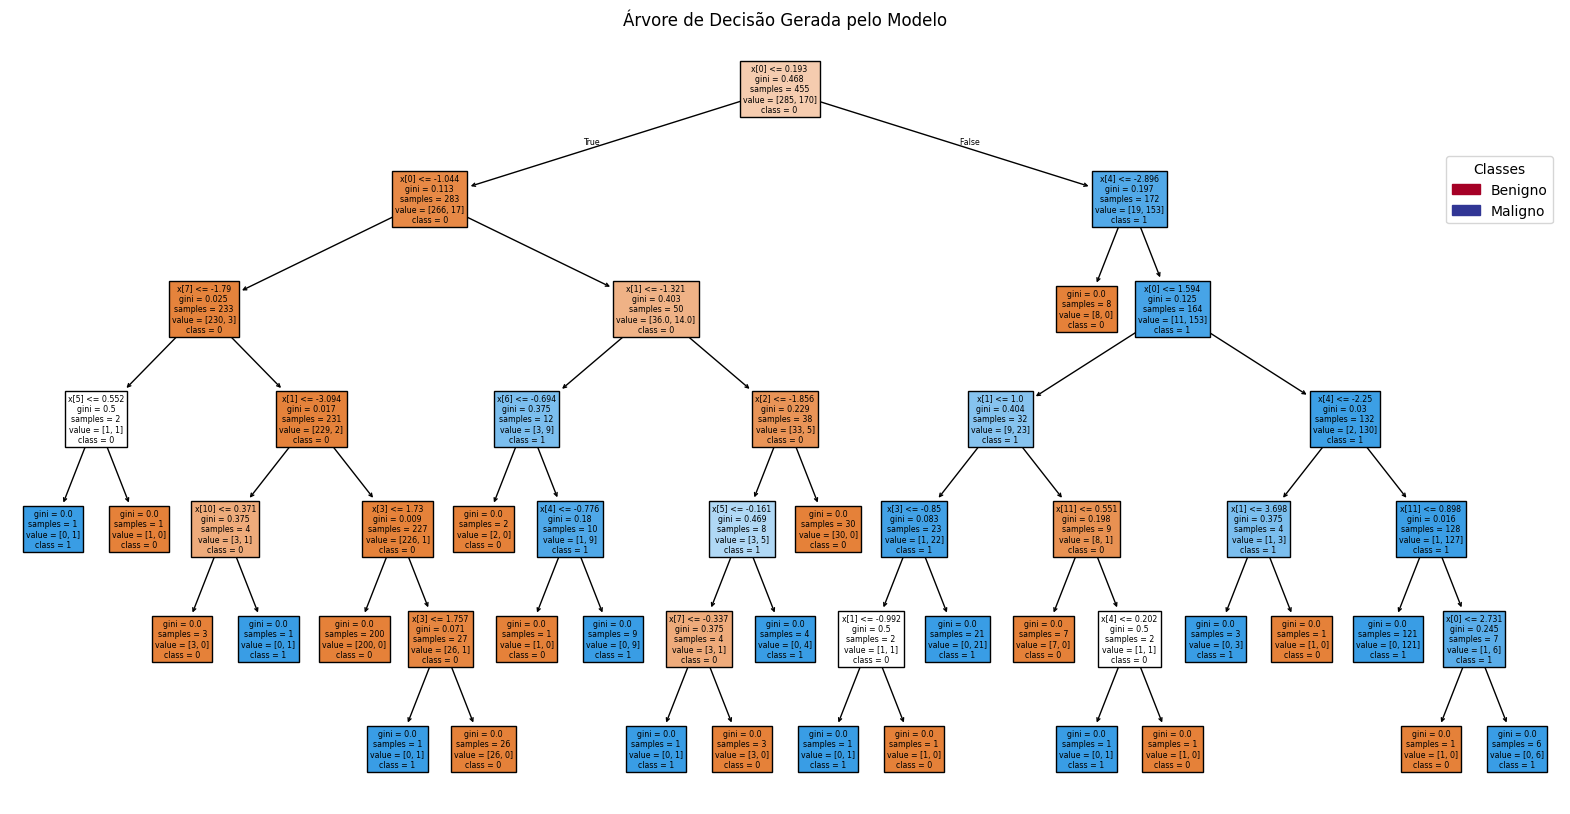

In [ ]:
# Visualização da árvore
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, class_names=[str(cls) for cls in tree_model.classes_])
plt.title("Árvore de Decisão Gerada pelo Modelo")

classes_legenda = ['Benigno', 'Maligno']
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(classes_legenda)))
patches = [mpatches.Patch(color=colors[i], label=str(cls)) for i, cls in enumerate(classes_legenda)]
plt.legend(handles=patches, title="Classes", loc="upper right", bbox_to_anchor=(1, 0.85))

plt.show()


# 5 - KNN (K-Nearest Neighbors)

O modelo KNN (K-Nearest Neighbors) é um algoritmo de classificação supervisionado.<br>
Calcula a distância euclidiana no conjunto de treinamento.<br>
Seleciona os K vizinhos mais próximos e define a classe de acordo com a maior ocorrencia. <br>


Acuracia: 0.9649
Precisao: 0.9750
Recall: 0.9286
F1 Score: 0.9512

Classification Report:
               precision    recall  f1-score   support

           0     0.9595    0.9861    0.9726        72
           1     0.9750    0.9286    0.9512        42

    accuracy                         0.9649       114
   macro avg     0.9672    0.9573    0.9619       114
weighted avg     0.9652    0.9649    0.9647       114



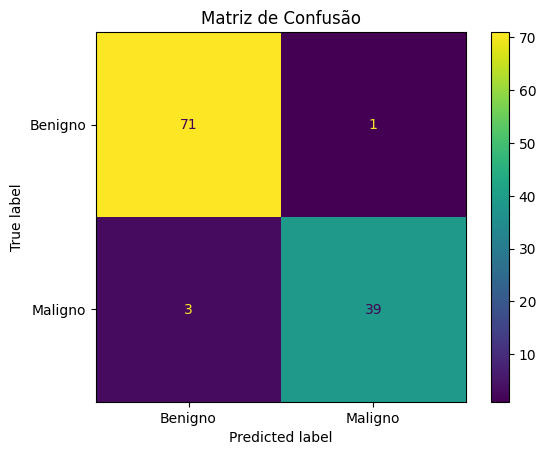

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,  y_train)

y_pred = knn.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
metricas_curva_roc.append(("K-Nearest Neighbors", fpr, tpr))

imprimeMetricas(y_test, y_pred)

imprimeMatrizConfusao(y_test, y_pred)




# Banchmark de Modelos com Cross-Validation

### Validação de modelos com cross-validation, comparando os resultados pelas médias das seguintes métricas:
* F1-Score: Média harmônica entre precisão e recall<br>
* ROC AUC: Área sob a curva ROC


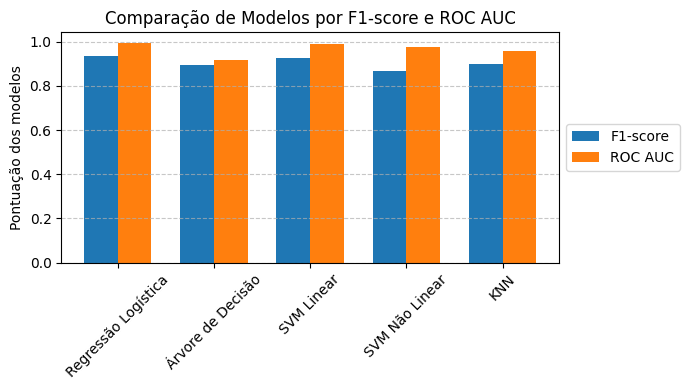

In [ ]:
#pipeline de modelos com cross validation, comparando os resultados com a média do F1 e do ROC AUC


modelos = {
    "Regressão Logística": LogisticRegression(solver='lbfgs', max_iter=1000),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "SVM Linear": SVC(kernel='linear', probability=True, random_state=42),
    "SVM Não Linear": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Armazenar resultados
f1_scores = []
roc_auc_scores = []
nomes_modelos = []

# Avaliar modelos
for nome, modelo in modelos.items():
    # Dividindo os dados em 5 grupos, testando 5 vezes
    resultados = cross_validate(modelo, X, y_map, cv=5, scoring=['f1', 'roc_auc'])
    f1_scores.append(np.mean(resultados['test_f1']))
    #
    roc_auc_scores.append(np.mean(resultados['test_roc_auc']))
    nomes_modelos.append(nome)

# Criar gráfico
x = np.arange(len(nomes_modelos))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 4))
bars1 = ax.bar(x - width/2, f1_scores, width, label='F1-score')
bars2 = ax.bar(x + width/2, roc_auc_scores, width, label='ROC AUC')

ax.set_ylabel('Pontuação dos modelos')
ax.set_title('Comparação de Modelos por F1-score e ROC AUC')
ax.set_xticks(x)
ax.set_xticklabels(nomes_modelos, rotation=45)
# ax.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# Plotar os gráficos das curvas HOC de cada um dos modelos

def plotCurvaRoc(nome_modelo, fpr, tpr, subplot=False, axs=None, col=None, line=None):
    roc_auc = auc(fpr, tpr)
    if subplot:
        axs[line, col].plot(fpr, tpr, color="blue", lw=2)
        axs[line, col].set_ylabel("Verdadeiros Positivos")
        axs[line, col].set_xlabel("Falsos Positivos")
        axs[line, col].set_xlim([0.0, 1.0])
        axs[line, col].set_xlim([0.0, 1.0])
        axs[line, col].set_title(f"Curva Roc: {nome_modelo}", fontsize=10)
        return


    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="blue", lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Falsos Positivos")
    plt.ylabel("Verdadeiros Positivos")
    plt.title(f"Curva Roc: {nome_modelo}")
    plt.show()



3


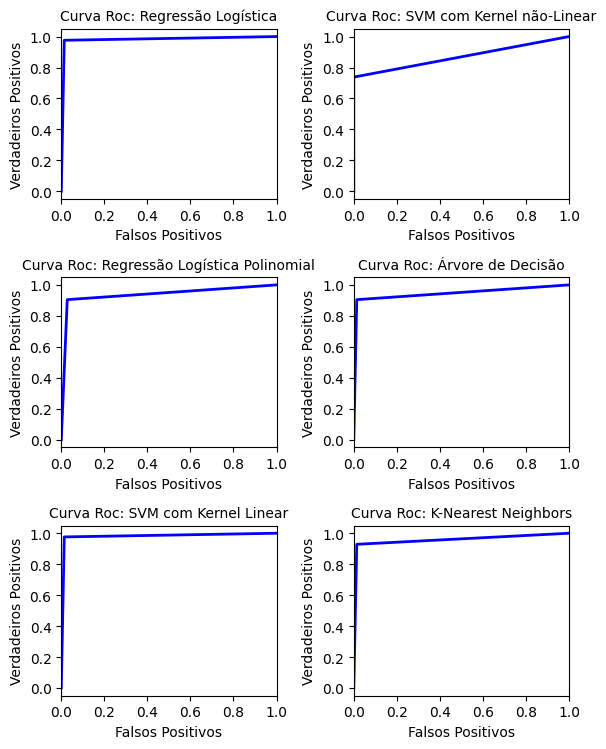

In [ ]:
colunas = 2
total = len(metricas_curva_roc)/colunas
total_linhas = int(total+1) if len(metricas_curva_roc) % colunas != 0 else int(total)
print(total_linhas)
fig, axs = plt.subplots(nrows=total_linhas, ncols=colunas, figsize=(6, 8))
coluna=0
while coluna < colunas:
    for linha in range(total_linhas):
        if coluna*total_linhas+linha >= len(metricas_curva_roc):
            break
        modelo = metricas_curva_roc[coluna*total_linhas+linha]
        plotCurvaRoc(*modelo, subplot=True, axs=axs, line=linha, col=coluna)
    coluna += 1
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

--- Avaliação do Modelo RandomForest ---
Acurácia: 0.9473684210526315

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


--- Importância das Features (Componentes Principais) ---


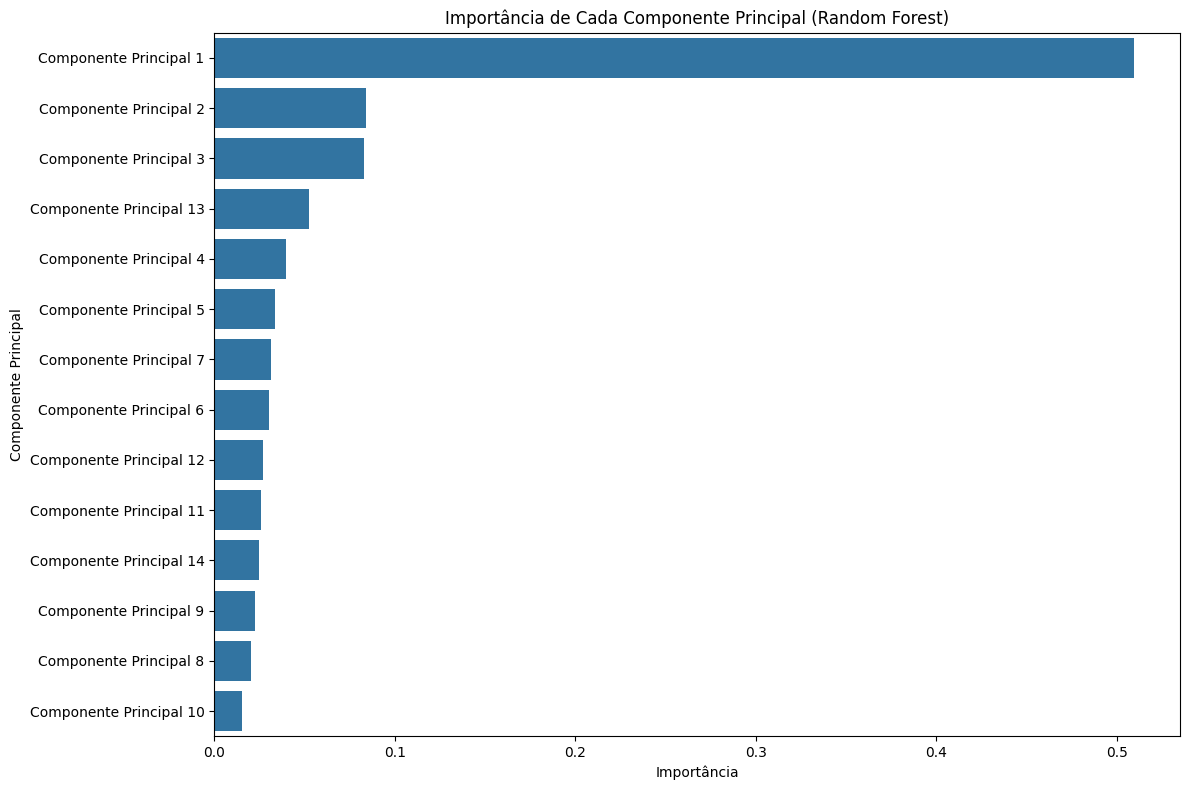

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# previsões e avaliar o modelo
y_pred_rf = rf_model.predict(X_test)
print("--- Avaliação do Modelo RandomForest ---")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))

print("\n--- Importância das Features (Componentes Principais) ---")
importances = rf_model.feature_importances_
num_pcs = X_pca.shape[1]
pc_names = [f'Componente Principal {i+1}' for i in range(num_pcs)]

# visualização
feature_importance_df = pd.DataFrame({'Feature': pc_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# PLOT
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância de Cada Componente Principal (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Componente Principal')
plt.tight_layout()
plt.show()

Arvore - Visual da figura da floresta para melhor visualização

Gerando a visualização MELHORADA da árvore (profundidade máxima: 3)...


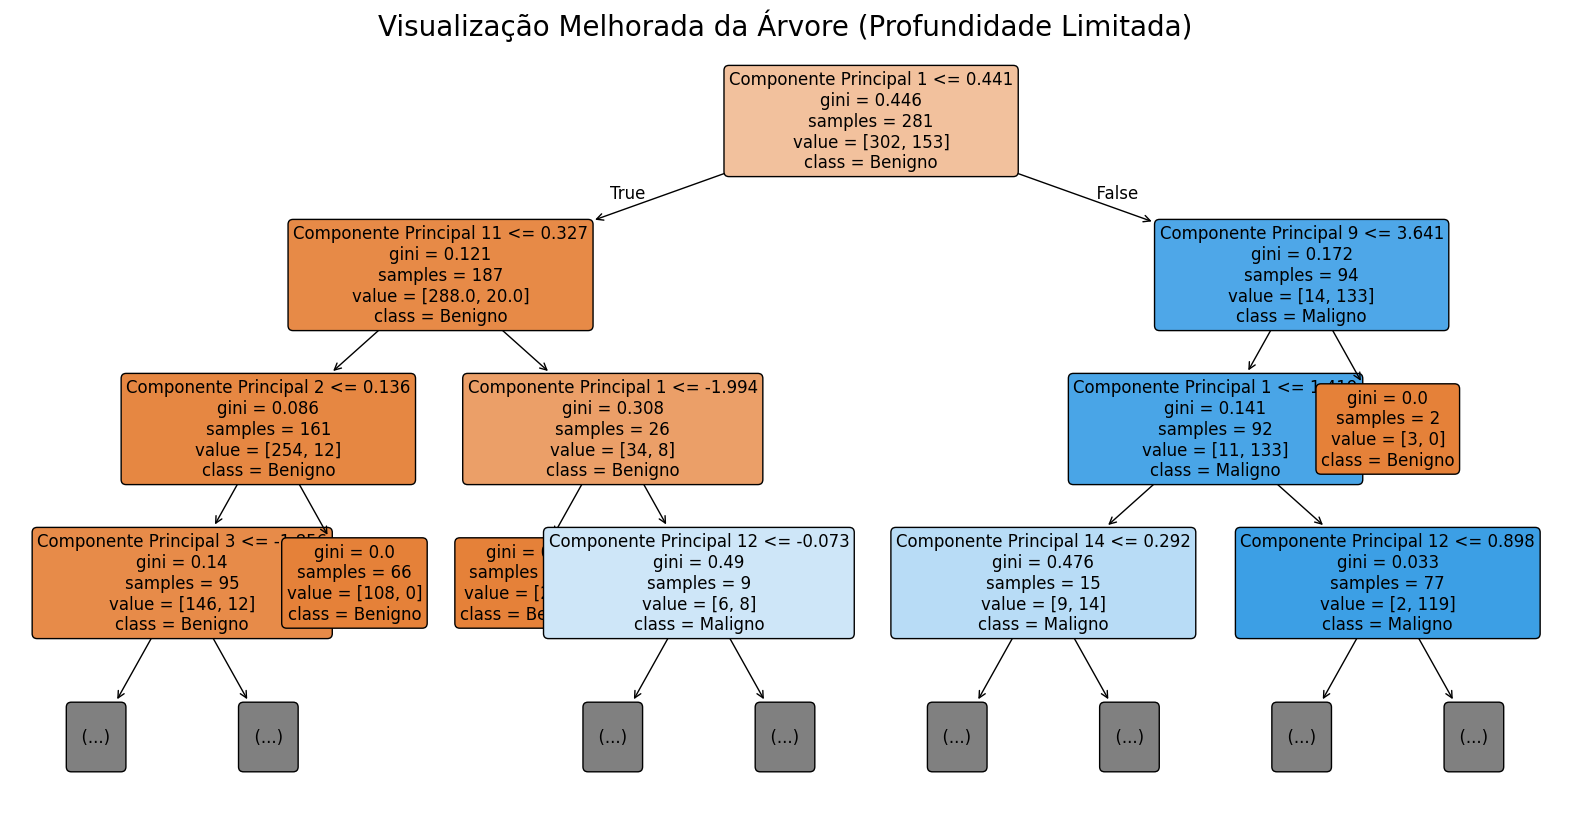

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

single_tree = rf_model.estimators_[0]

num_pcs = X_pca.shape[1]
pc_names = [f'Componente Principal {i+1}' for i in range(num_pcs)]
class_names = ['Benigno', 'Maligno']
print("Gerando a visualização MELHORADA da árvore (profundidade máxima: 3)...")
plt.figure(figsize=(20, 10))

plot_tree(single_tree,
          max_depth=3,
          feature_names=pc_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=12)

plt.title("Visualização Melhorada da Árvore (Profundidade Limitada)", fontsize=20)
plt.show()

# Aplicando Modelos Naive Bayes e Redes Neurais

Acuracia: 0.9035
Precisao: 0.8974
Recall: 0.8333
F1 Score: 0.8642

Classification Report:
               precision    recall  f1-score   support

           0     0.9067    0.9444    0.9252        72
           1     0.8974    0.8333    0.8642        42

    accuracy                         0.9035       114
   macro avg     0.9021    0.8889    0.8947       114
weighted avg     0.9033    0.9035    0.9027       114



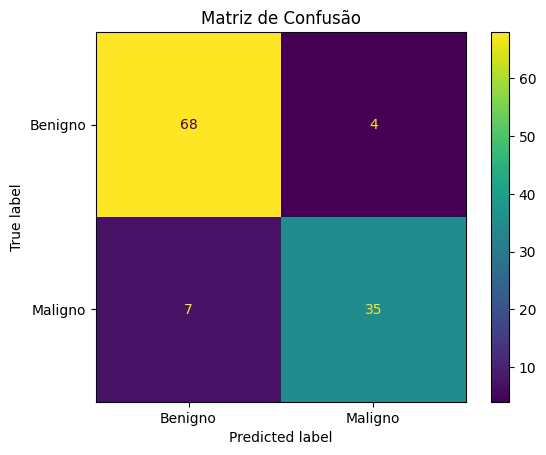

In [ ]:
# aplicar o Gaussian Naive Bayes
# método probabilístico. Usa o Teorema de Bayes
# métodos dessa família são chamados de ingênuos, pois consideram que as features são condiconalmente indepedentes entre si e em relação a variável alvo
# a partir de conhecimentos de probabilidade a priori usamos para descobrir a probablidade posteriori de eventos relacionados
# este aplica a distribuição gaussiana em conjunto. Para cada característica ele calcula média e variancia e as usa para calcular a densidade de probabilidade
# Combina essas probabilidade para calcular a probabilidade geral do ponto em pertencer a uma classe. Aquela com maior probabilidade é a classe prevista
#vantagens: simplicidade, eficiência, velocidade. Bom com dados contínuos. Fácil de implementar
#desvantagens: supocisão ingênuo, o que diminui a precisão no mundo real. Sensível a valores discrepantes, por usar uma distribuição gaussiana

from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
imprimeMetricas(y_test, y_pred)
imprimeMatrizConfusao(y_test, y_pred)

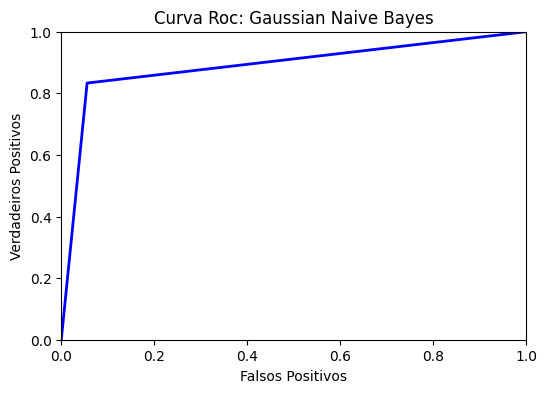

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plotCurvaRoc("Gaussian Naive Bayes", fpr,tpr)

Acuracia: 0.9035
Precisao: 0.8298
Recall: 0.9286
F1 Score: 0.8764

Classification Report:
               precision    recall  f1-score   support

           0     0.9552    0.8889    0.9209        72
           1     0.8298    0.9286    0.8764        42

    accuracy                         0.9035       114
   macro avg     0.8925    0.9087    0.8986       114
weighted avg     0.9090    0.9035    0.9045       114



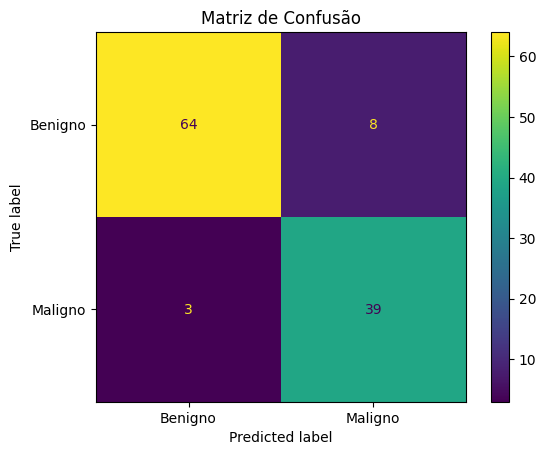

In [ ]:
# aplicar o Bernoulli Naive Bayes
# Compartilha as mesmas cartacterísticas do Gaussian Naive Bayes, exceto:
# Usar a distribuição de Bernoulli. Uma distribuição discreta onde só dois resultados são possíveis, sucesso e fracasso.
# O algoritmo é usado para classificação de dados binários e por isso é sensível a dados não binários

from sklearn.naive_bayes import BernoulliNB
modelo = BernoulliNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
imprimeMetricas(y_test, y_pred)
imprimeMatrizConfusao(y_test, y_pred)

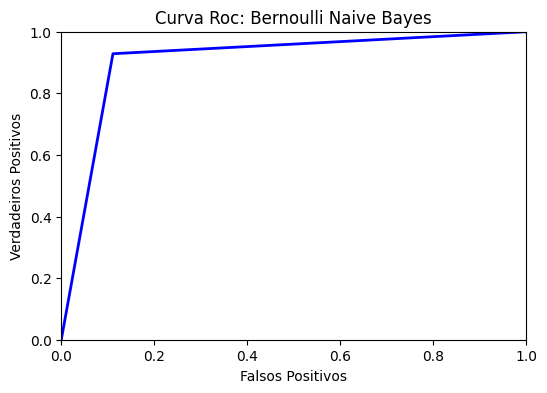

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plotCurvaRoc("Bernoulli Naive Bayes", fpr,tpr)

In [ ]:
#aplicar rede neural simples: MLPClassifier (Multi-layer Perceptron)
# Redes Neurais Perceptron com Multicamadas (3 camadas ou mais).
# São mais simples que as redes profundas, por ter menos camadas
# Podem lidar com vários tipos de dados
# Suas vantagens são a flexibilidade e a escalabilidade
# Suas desvantagens são o maior risco de overfitting, sensibilidade aos parâmetros e complexidade

#Usando GridSearch para escolher os melhores parâmetros
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"hidden_layer_sizes": [10, 20, 30, 40, 50],
     "activation": ["relu", "logistic"],
     "solver": ["lbfgs", "adam", "sgd"]}, {
     }
]

modelo = MLPClassifier(random_state=42, max_iter=100)
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring="recall", return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100, random_state=42),
             param_grid=[{'activation': ['relu', 'logistic'],
                          'hidden_layer_sizes': [10, 20, 30, 40, 50],
                          'solver': ['lbfgs', 'adam', 'sgd']},
                         {}],
             return_train_score=True, scoring='recall')

In [ ]:
melhor_modelo = grid_search.best_estimator_
#melhor modelo
grid_search.best_estimator_


MLPClassifier(hidden_layer_sizes=40, max_iter=100, random_state=42,
              solver='lbfgs')

Acuracia: 0.9035
Precisao: 0.8298
Recall: 0.9286
F1 Score: 0.8764

Classification Report:
               precision    recall  f1-score   support

           0     0.9552    0.8889    0.9209        72
           1     0.8298    0.9286    0.8764        42

    accuracy                         0.9035       114
   macro avg     0.8925    0.9087    0.8986       114
weighted avg     0.9090    0.9035    0.9045       114



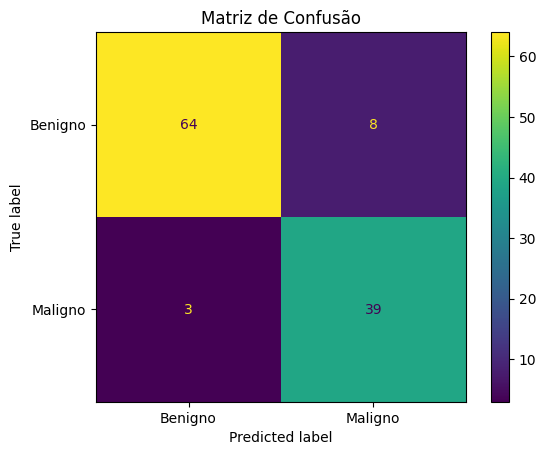

In [ ]:
y__pred = melhor_modelo.predict(X_test)
imprimeMetricas(y_test, y_pred)
imprimeMatrizConfusao(y_test, y_pred)

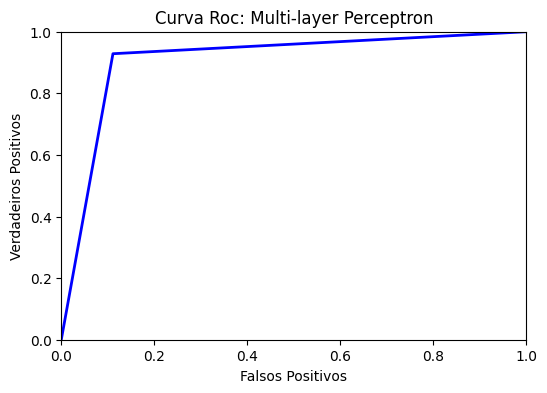

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plotCurvaRoc("Multi-layer Perceptron", fpr,tpr)

In [ ]:
# aplicar Redes Neurais com Keras/TensorFlow (3 camadas: 14, 10 e 1 neurônios)
#relu: f(x) = max(x,0)
import tensorflow as tf
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(14,)),
    tf.keras.layers.Dense(10, activation="relu"),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall', 'precision'])
modelo.fit(X_train, y_train, epochs=5)
loss, accuracy, recall, precision = modelo.evaluate(X_test, y_test)
print(f"Loss: {loss:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3919 - loss: 0.9150 - precision: 0.2363 - recall: 0.3237
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4532 - loss: 0.8955 - precision: 0.2830 - recall: 0.3395
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5149 - loss: 0.8424 - precision: 0.3672 - recall: 0.3316
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6199 - loss: 0.7198 - precision: 0.5123 - recall: 0.4805
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6318 - loss: 0.6936 - precision: 0.4961 - recall: 0.4817
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6632 - loss: 0.6046 - precision: 0.5675 - recall: 0.4591 
Loss: 0.63
Accuracy: 0.66
Recall: 0.45
Precision: 0.54


In [ ]:
y_pred = modelo.predict(X_test)
y_pred_probs = modelo.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


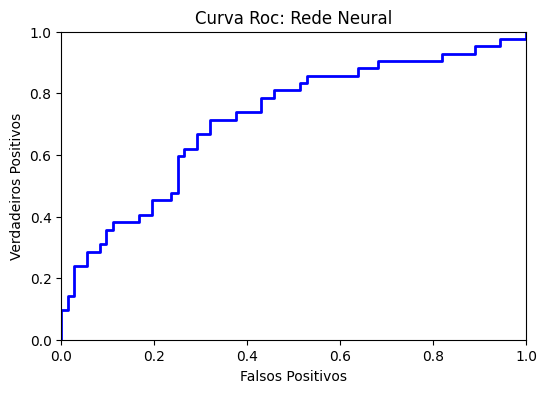

In [ ]:
plotCurvaRoc("Rede Neural", fpr, tpr )

In [ ]:

y_pred_labels = (y_pred_probs >= 0.5).astype(int)


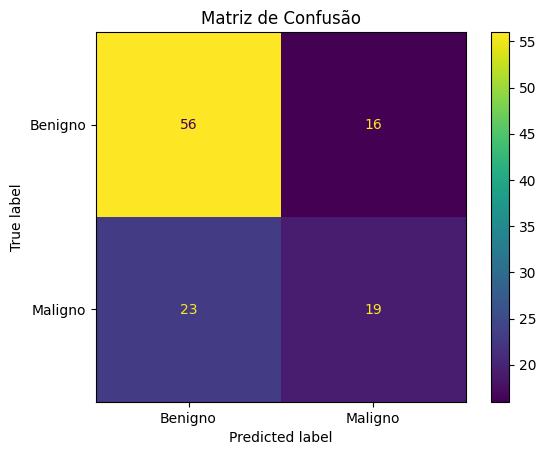

In [ ]:
imprimeMatrizConfusao(y_test, y_pred_labels)

Iniciando a avaliação de todos os modelos com suas configurações específicas...
-> Modelo 'Decision Tree' avaliado.
-> Modelo 'Random Forest' avaliado.
-> Modelo 'Gaussian NB' avaliado.
-> Modelo 'Bernoulli NB' avaliado.
-> Modelo 'MLP Classifier' avaliado.

--- Tabela Comparativa de Desempenho dos Modelos (Configurações Finais) ---
           Modelo  Acurácia  Precisão    Recall  F1-Score
0  MLP Classifier  0.964912  0.975000  0.928571  0.951220
1   Decision Tree  0.956140  1.000000  0.880952  0.936709
2   Random Forest  0.947368  0.928571  0.928571  0.928571
3    Bernoulli NB  0.903509  0.829787  0.928571  0.876404
4     Gaussian NB  0.903509  0.897436  0.833333  0.864198

Gerando gráfico comparativo final...


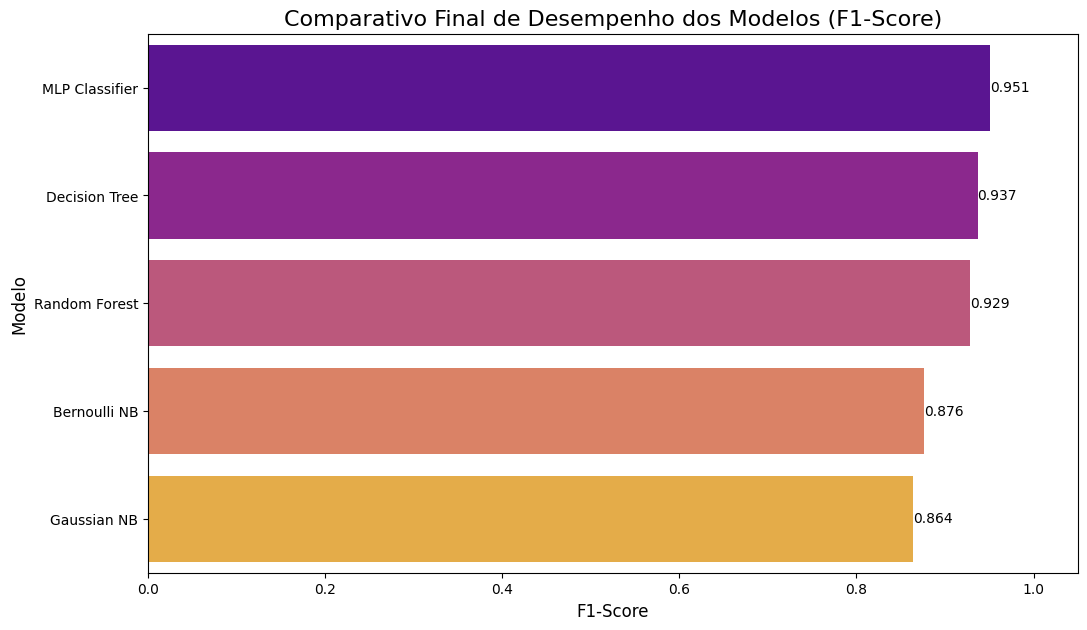

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gaussian NB": GaussianNB(),
    "Bernoulli NB": BernoulliNB(),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# armazenar os resultados
results = {
    "Modelo": [],
    "Acurácia": [],
    "Precisão": [],
    "Recall": [],
    "F1-Score": []
}

# treinar, prever e avaliar cada um dos modelos configurados
print("Iniciando a avaliação de todos os modelos com suas configurações específicas...")
for name, model in models.items():
    model.fit(X_train, y_train)
    # previsões
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Armazenar os resultados
    results["Modelo"].append(name)
    results["Acurácia"].append(accuracy)
    results["Precisão"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    print(f"-> Modelo '{name}' avaliado.")

# DataFrame de resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-Score", ascending=False).reset_index(drop=True)


print("\n--- Tabela Comparativa de Desempenho dos Modelos (Configurações Finais) ---")
print(results_df)

# 6. Gerar o gráfico de barras para a comparação final
print("\nGerando gráfico comparativo final...")
plt.figure(figsize=(12, 7))
ax = sns.barplot(x="F1-Score", y="Modelo", data=results_df, palette="plasma")

# Adicionar os valores nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height()/2,
             f'{width:.3f}',
             va="center")

plt.title("Comparativo Final de Desempenho dos Modelos (F1-Score)", fontsize=16)
plt.xlabel("F1-Score", fontsize=12)
plt.ylabel("Modelo", fontsize=12)
plt.xlim(0, 1.05)
plt.show()